# Load the models

In [21]:
import cobra
from cobra import Reaction, Metabolite

In [41]:
# import the models
from cobra.io import load_json_model
ecoli = load_json_model("ecoli.json")
pf = load_json_model("pf.json")
# print(ecoli.optimize())
# print(pf.optimize())
    
# load peripheral packages
import warnings
warnings.filterwarnings(action='once')
from pandas import set_option
set_option("display.max_rows", None)
from time import process_time

# Load the conditions

In [3]:
# Define the standard graphs from each simulation
graphs_list = [
    {
        'trial':'G48',
        "phenotype": '*',
        'content': 'biomass',
        'experimental_data': False,
        # "parsed":True
    },
    {
        'trial':'G48',
        'content': "conc",
    },
    {
        'trial':'G48',
        "phenotype": '*',
        'content': 'biomass',
        "parsed": True
    },
    {
        'trial':'G48',
        'content': 'total_biomass',
        'experimental_data': True
    }
]

def update_graphs(trial):
    graphs = graphs_list.copy()
    for graph in graphs:
        graph["trial"] = trial
    return graphs

In [4]:
species_abundances = {
    1:{"ecoli":0, "pf":1},
    2:{"ecoli":1, "pf":50},
    3:{"ecoli":1, "pf":20},
    4:{"ecoli":1, "pf":10},
    5:{"ecoli":1, "pf":3},
    6:{"ecoli":1, "pf":1},
    7:{"ecoli":3, "pf":1},
    8:{"ecoli":10, "pf":1},
    9:{"ecoli":20, "pf":1},
    10:{"ecoli":1, "pf":0},
    11:{"ecoli":0, "pf":0}
}
carbon_conc_series = {'rows': {
    'cpd00136': {'B':0, 'C': 0, 'D': 1, 'E': 1, 'F': 4, 'G': 4},
    'cpd00179': {'B':5, 'C': 5, 'D':5, 'E': 5, 'F': 5, 'G': 5},
}}
species_identities_rows = {
    1:{"ecoli":"mRuby"},
    2:{"ecoli":"ACS"},
    3:{"ecoli":"mRuby"},
    4:{"ecoli":"ACS"},
    5:{"ecoli":"mRuby"},
    6:{"ecoli":"ACS"}
}

# Simulate

In [6]:
for met in ecoli.metabolites:
    print(met.name)

ABEE_c0
2-Amino-4-hydroxy-6-hydroxymethyl-7-8-dihydropteridinediphosphate_c0
PPi_c0
H+_c0
Dihydropteroate_c0
ATP_c0
Glycine_c0
gamma-Glutamylcysteine_c0
ADP_c0
Phosphate_c0
GSH_c0
IMP_c0
PRPP_c0
HYXN_c0
H+_e0
Adenosine_e0
Adenosine_c0
NAD_c0
2,3-Dihydroxy-2,3-dihydrobenzoate_c0
NADH_c0
2,3-Dihydroxybenzoate_c0
heptosyl-phospho-heptosyl-heptosyl-kdo2-lipidA_c0
phospho-heptosyl-phospho-heptosyl-heptosyl-kdo2-lipidA_c0
Acetyl-CoA_c0
L-Serine_c0
CoA_c0
O-Acetyl-L-serine_c0
CMP_c0
CDP_c0
Fumarate_e0
Fumarate_c0
UDP-N-acetylglucosamine_c0
Undecaprenyl-diphospho-N-acetylmuramoyl-L-alanyl-D-glutamyl-meso-2-6-diaminopimeloyl-D-alanyl-D-alanine_c0
UDP_c0
Undecaprenyl-diphospho-N-acetylmuramoyl--N-acetylglucosamine-L-ala-D-glu-meso-2-6-diaminopimeloyl-D-ala-D-ala_c0
H2O_c0
Isochorismate_c0
Pyruvate_c0
fa6_c0
AMP_c0
fa6coa_c0
L-Glutamate_c0
L-Cysteine_c0
7-methyl-trans-oct-2-enoyl-ACP_c0
7-methyl-octanoyl-ACP_c0
FAD_c0
L-Malate_c0
Oxaloacetate_c0
FADH2_c0
dCDP_c0
dCTP_c0
CO2_c0
Phosphoenolpyruvate

In [6]:
for met in pf.metabolites:
    print(met.name)

ABEE_c0
2-Amino-4-hydroxy-6-hydroxymethyl-7-8-dihydropteridinediphosphate_c0
PPi_c0
H+_c0
Dihydropteroate_c0
ATP_c0
Glycine_c0
gamma-Glutamylcysteine_c0
ADP_c0
Phosphate_c0
GSH_c0
Lipoamide_c0
2-Methyl-1-hydroxypropyl-TPP_c0
TPP_c0
S-(2-Methylpropionyl)-dihydrolipoamide_c0
IMP_c0
PRPP_c0
HYXN_c0
Acetyl-CoA_c0
L-Serine_c0
CoA_c0
O-Acetyl-L-serine_c0
CMP_c0
CDP_c0
H+_e0
Fumarate_e0
Fumarate_c0
UDP-N-acetylglucosamine_c0
Undecaprenyl-diphospho-N-acetylmuramoyl-L-alanyl-D-glutamyl-meso-2-6-diaminopimeloyl-D-alanyl-D-alanine_c0
UDP_c0
Undecaprenyl-diphospho-N-acetylmuramoyl--N-acetylglucosamine-L-ala-D-glu-meso-2-6-diaminopimeloyl-D-ala-D-ala_c0
H2O_c0
Isochorismate_c0
Pyruvate_c0
2,3-Dihydroxy-2,3-dihydrobenzoate_c0
fa6_c0
AMP_c0
fa6coa_c0
L-Glutamate_c0
L-Cysteine_c0
FAD_c0
L-Malate_c0
Oxaloacetate_c0
FADH2_c0
dCDP_c0
dCTP_c0
CO2_c0
Phosphoenolpyruvate_c0
Nitrite_e0
Nitrite_c0
trans-4-Hydroxy-L-proline_c0
cis-4-Hydroxy-D-proline_c0
2-Hydroxyethyl-ThPP_c0
S-Acetyldihydrolipoamide_c0
Ornith

In [5]:
# checking if the metabolite of interest is in the E.coli model

exists = "false"
for met in ecoli.metabolites:
    if met.id == "cpd00480_c0":
        exists = "true"
print(exists)

true


In [18]:
# checking if the metabolite of interest is in the P.fluorescens model

exists = "false"
for met in pf.metabolites:
    if met.id == "cpd00027_c0":
        exists = "true"
print(exists)

true


## Parameterize the data

### A bioproduction phenotype

In [7]:
exists = "false"
for ex in ecoli.exchanges:
    if met.id == "EX_cpd00480_c0":
        exists = "true"
print(exists)

Could not identify an external compartment by name and choosing one with the most boundary reactions. That might be complete nonsense or change suddenly. Consider renaming your compartments using `Model.compartments` to fix this.


false


In [8]:
# checking if the exchange reaction is in P.fluorescens model

exists = "false"
for ex in pf.exchanges:
    if ex.id == "EX_cpd00480_c0":
        exists = "true"
print(exists)

Could not identify an external compartment by name and choosing one with the most boundary reactions. That might be complete nonsense or change suddenly. Consider renaming your compartments using `Model.compartments` to fix this.


false


In [5]:
# create requisite exchange metabolite
#cyto_met = ecoli.metabolites.get_by_id("cpd00150_c0")
cyto_met = pf.metabolites.get_by_id("cpd00150_c0")
ex_met = cyto_met.copy()
ex_met.id = "cpd00150_c0"
ex_met.compartment = "e0"

# add metabolite to each model
#ecoli.add_metabolites([ex_met])
pf.add_metabolites([ex_met])

# add exchange reactions
#ecoli.add_boundary(ex_met, type="exchange")
pf.add_boundary(ex_met, type="exchange")

Could not identify an external compartment by name and choosing one with the most boundary reactions. That might be complete nonsense or change suddenly. Consider renaming your compartments using `Model.compartments` to fix this.


Reaction identifier,EX_cpd00150_c0
Name,HCN_c0 exchange
Memory address,0x129869d90
Stoichiometry,cpd00150_c0 <=> HCN_c0 <=>
GPR,
Lower bound,-1000.0
Upper bound,1000.0


In [10]:
# defining corresponding transport reaction
cpd00154_tr = Reaction("cpd00154_tr")
cpd00154_tr.name = "cpd00154 Transport"
cpd00154_tr.add_metabolites({
    ex_met: -1, cyto_met: 1
})

In [8]:
# finding reactions containing the metabolite of interest in our model
for rxn in pf.metabolites.cpd00100_c0.reactions:
    print(rxn)

rxn08669_c0: cpd00001_c0 + cpd02090_c0 --> cpd00067_c0 + cpd00080_c0 + cpd00100_c0
rxn29769_c0: cpd00001_c0 + cpd00002_c0 + cpd00100_e0 --> cpd00008_c0 + cpd00009_c0 + cpd00067_c0 + cpd00100_c0
rxn00615_c0: cpd00002_c0 + cpd00100_c0 --> cpd00008_c0 + cpd00067_c0 + cpd00080_c0
rxn00763_c0: cpd00003_c0 + cpd00100_c0 <=> cpd00004_c0 + cpd00067_c0 + cpd00448_c0
rxn10336_c0: 2 cpd15540_c0 --> cpd00100_c0 + cpd15793_c0
rxn05581_c0: cpd00100_c0 <=> cpd00100_e0


In [42]:
# adding relevant metabolites
cpd00007_c0 = Metabolite(
    'cpd00007_c0',
    formula = 'O2',
    name = 'O2',
    compartment = 'c')
cpd00024_c0 = Metabolite(
    'cpd00024_c0',
    formula = 'C5H4O5',
    name = '2-Oxoglutarate',
    compartment = 'c')
cpd02374_c0 = Metabolite(
    'cpd02374_c0',
    formula = 'C9H21N2O2',
    name = 'N6,N6,N6-Trimethyl-L-lysine',
    compartment = 'c')
cpd00011_c0 = Metabolite(
    'cpd00011_c0',
    formula = 'CO2',
    name = 'CO2',
    compartment = 'c')
cpd00036_c0 = Metabolite(
    'cpd00036_c0',
    formula = 'C4H4O4',
    name = 'Succinate',
    compartment = 'c')
cpd00923_c0 = Metabolite(
    'cpd00923_c0',
    formula = 'C9H21N2O3',
    name = '3-Hydroxy-N6,N6,N6-trimethyl-L-lysine',
    compartment = 'c')

In [43]:
# adding relevant reaction
rxn02469 = Reaction(id = "rxn02469")

rxn02469.add_metabolites({
    cpd00007_c0: -1, 
    cpd00024_c0: -1, 
    cpd02374_c0: -1, 
    cpd00011_c0: 1,
    cpd00036_c0: 1,
    cpd00923_c0: 1
})
pf.add_reactions([rxn02469])

In [47]:
solution = pf.optimize()
print(solution)

pf.summary()

<Solution 0.494 at 0x13462e0d0>


Metabolite,Reaction,Flux,C-Number,C-Flux
cpd00007_e0,EX_cpd00007_e0,10,0,0.00%
cpd00009_e0,EX_cpd00009_e0,0.3765,0,0.00%
cpd00013_e0,EX_cpd00013_e0,4.252,0,0.00%
cpd00029_e0,EX_cpd00029_e0,15.13,2,100.00%
cpd00030_e0,EX_cpd00030_e0,0.001385,0,0.00%
cpd00034_e0,EX_cpd00034_e0,0.001385,0,0.00%
cpd00048_e0,EX_cpd00048_e0,0.1118,0,0.00%
cpd00058_e0,EX_cpd00058_e0,0.001385,0,0.00%
cpd00063_e0,EX_cpd00063_e0,0.001385,0,0.00%
cpd00067_e0,EX_cpd00067_e0,11.91,0,0.00%



 GCF_000005845.2.RAST.mdl

 GCF_001612705.1.RAST.mdl
The ['B2', 'B3', 'B4', 'B5', 'B6', 'B8', 'B9', 'B10', 'B11', 'B12', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F12', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10', 'G11', 'G12'] trials were dropped from the OD measurements per the ignore_trials parameter.
The [97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166] timesteps (with [1.12550559 1.12537038 1.12105398 1.11597471 1.11273534 1.12893569
 1.13334937 1.133368

/Users/ashleyeng/Library/Python/3.9/lib/python/site-packages/modelseedpy/community/mscommphitting.py:948: UserWarning: The conversion factor 5e-06 optimized to a bound, which may be indicative of an error, such as improper kinetic rates.
  warnings.warn(f"The conversion factor {value} optimized to a bound, which may be "


ethanol.zip
graph_0
{'content': 'biomass',
 'experimental_data': False,
 'painting': {'OD': {'color': 'blue',
                     'linestyle': 'solid',
                     'name': 'Total biomass'},
              'ecoli': {'color': 'red',
                        'linestyle': 'dashed',
                        'name': 'E. coli'},
              'pf': {'color': 'green',
                     'linestyle': 'dotted',
                     'name': 'P. fluorescens'}},
 'parsed': False,
 'phenotype': {'stationary', 'Xylose', 'Acetate'},
 'species': ['OD', 'pf', 'ecoli'],
 'trial': 'G6'}
graph_1
{'content': 'conc',
 'experimental_data': False,
 'mets': ['cpd00363', 'cpd00154'],
 'painting': {'OD': {'color': 'blue',
                     'linestyle': 'solid',
                     'name': 'Total biomass'},
              'ecoli': {'color': 'red',
                        'linestyle': 'dashed',
                        'name': 'E. coli'},
              'pf': {'color': 'green',
                     'lines

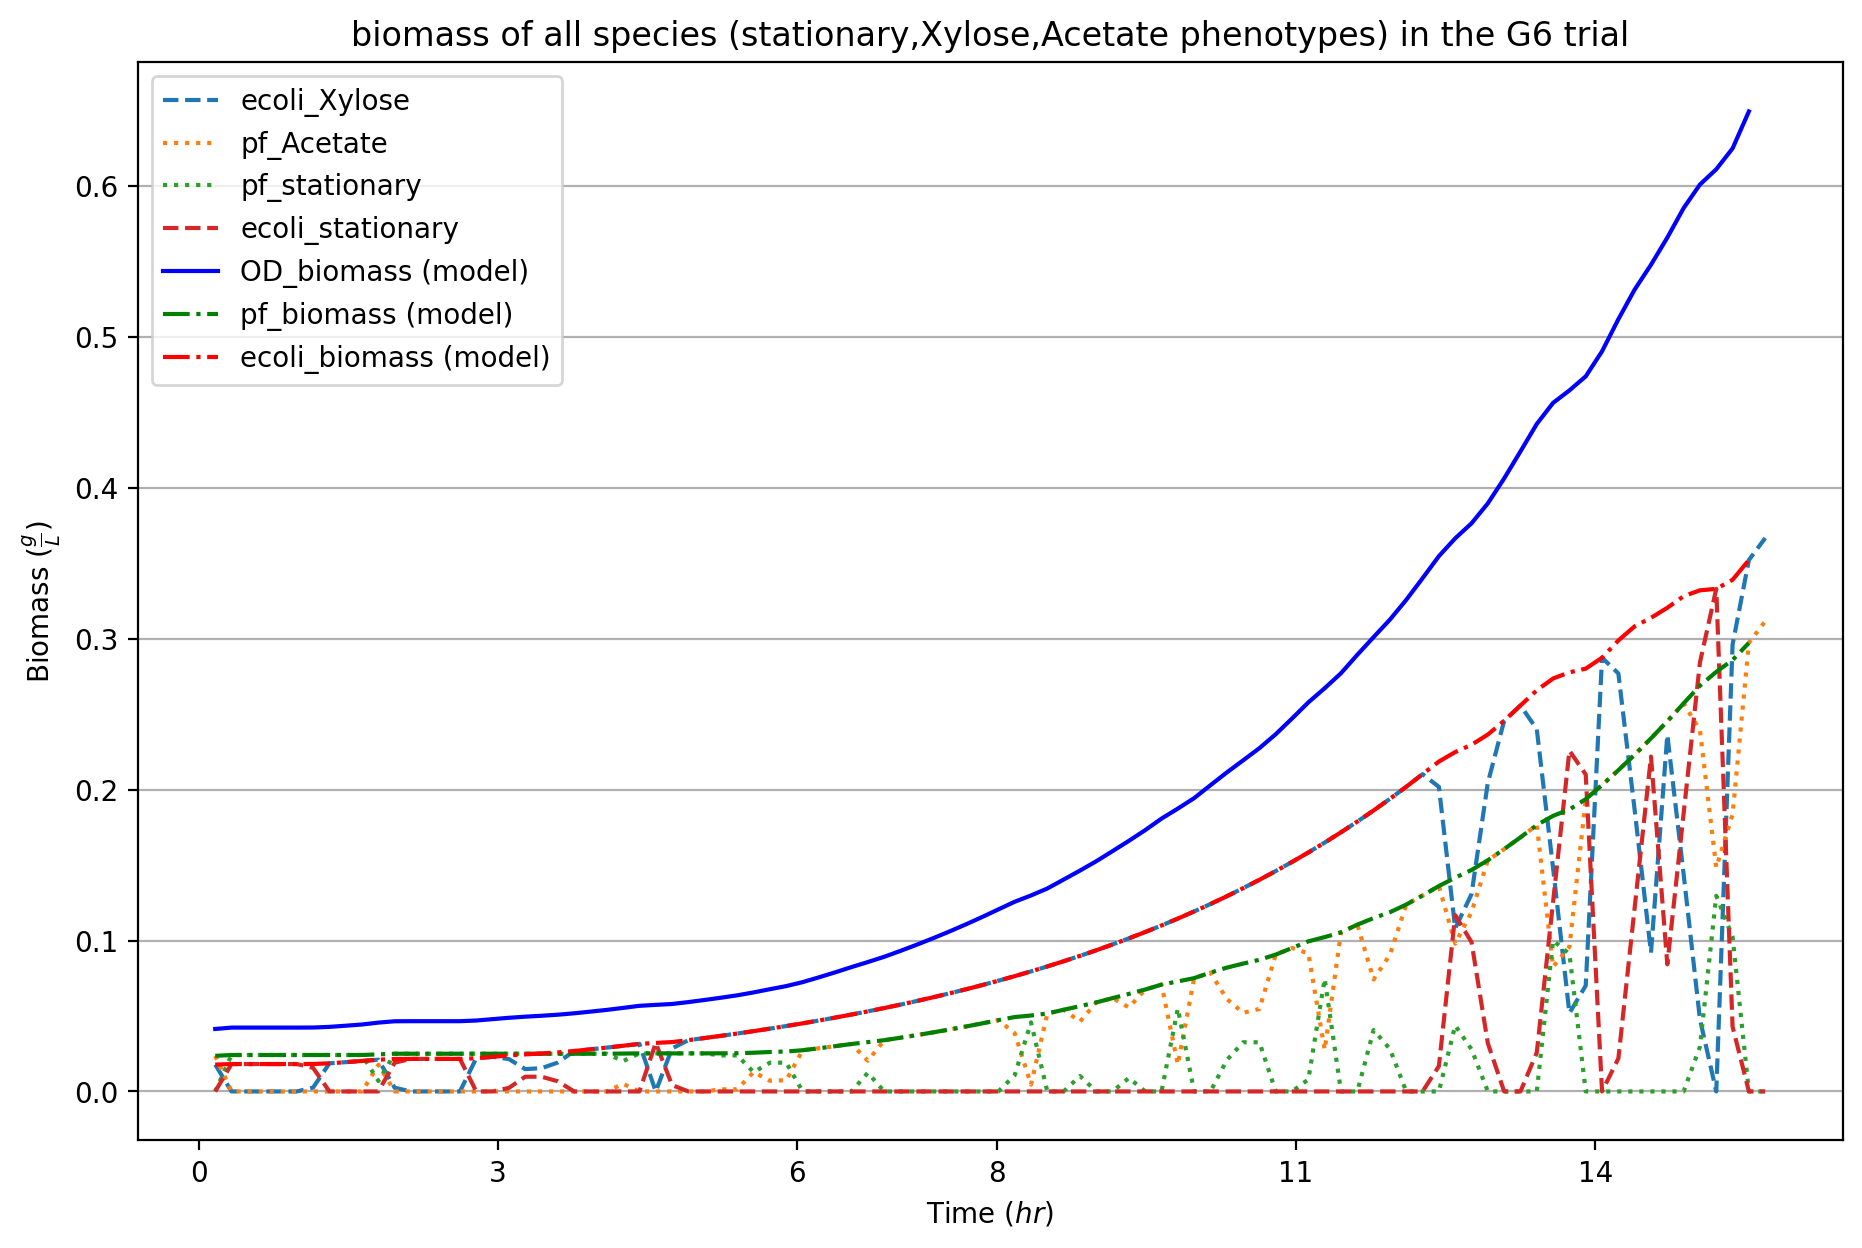

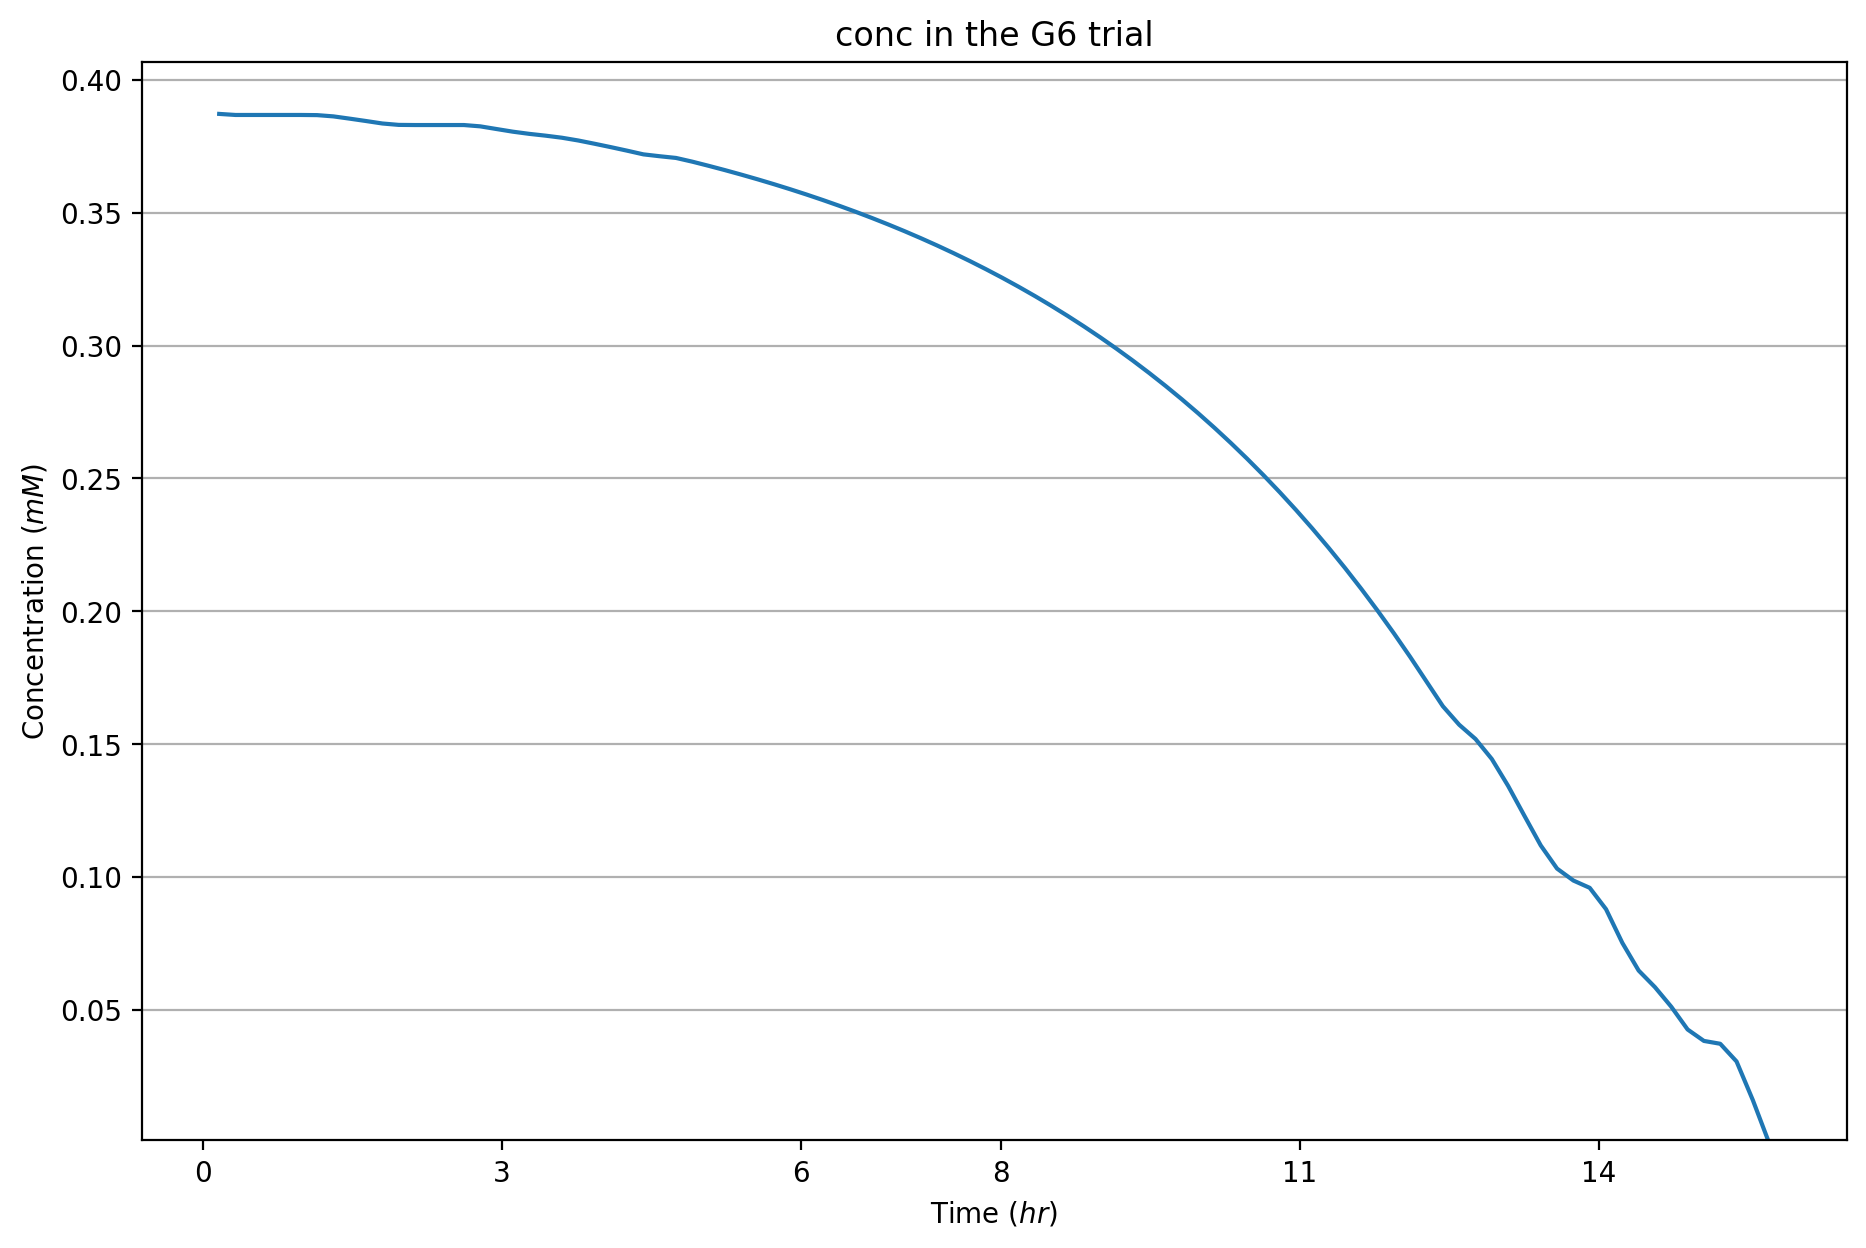

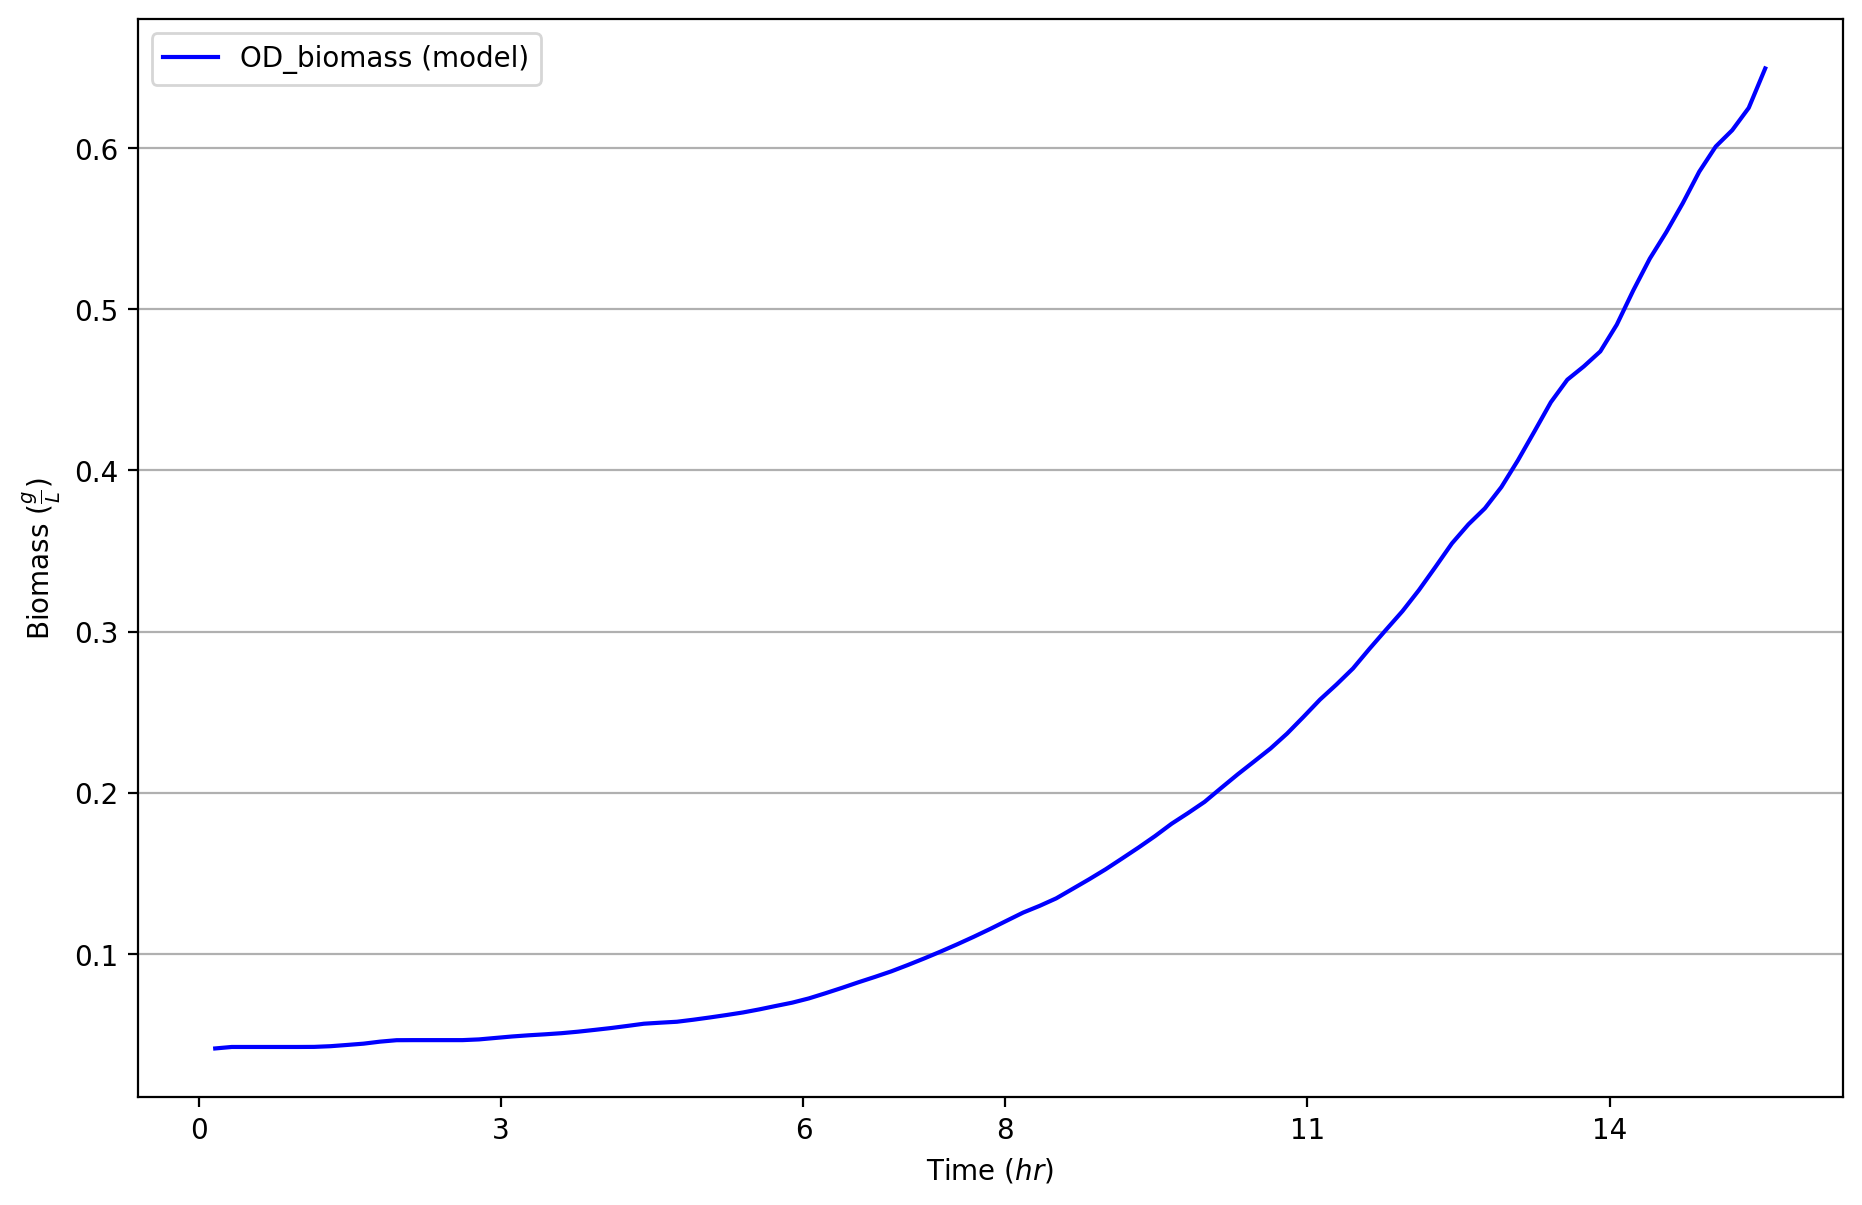

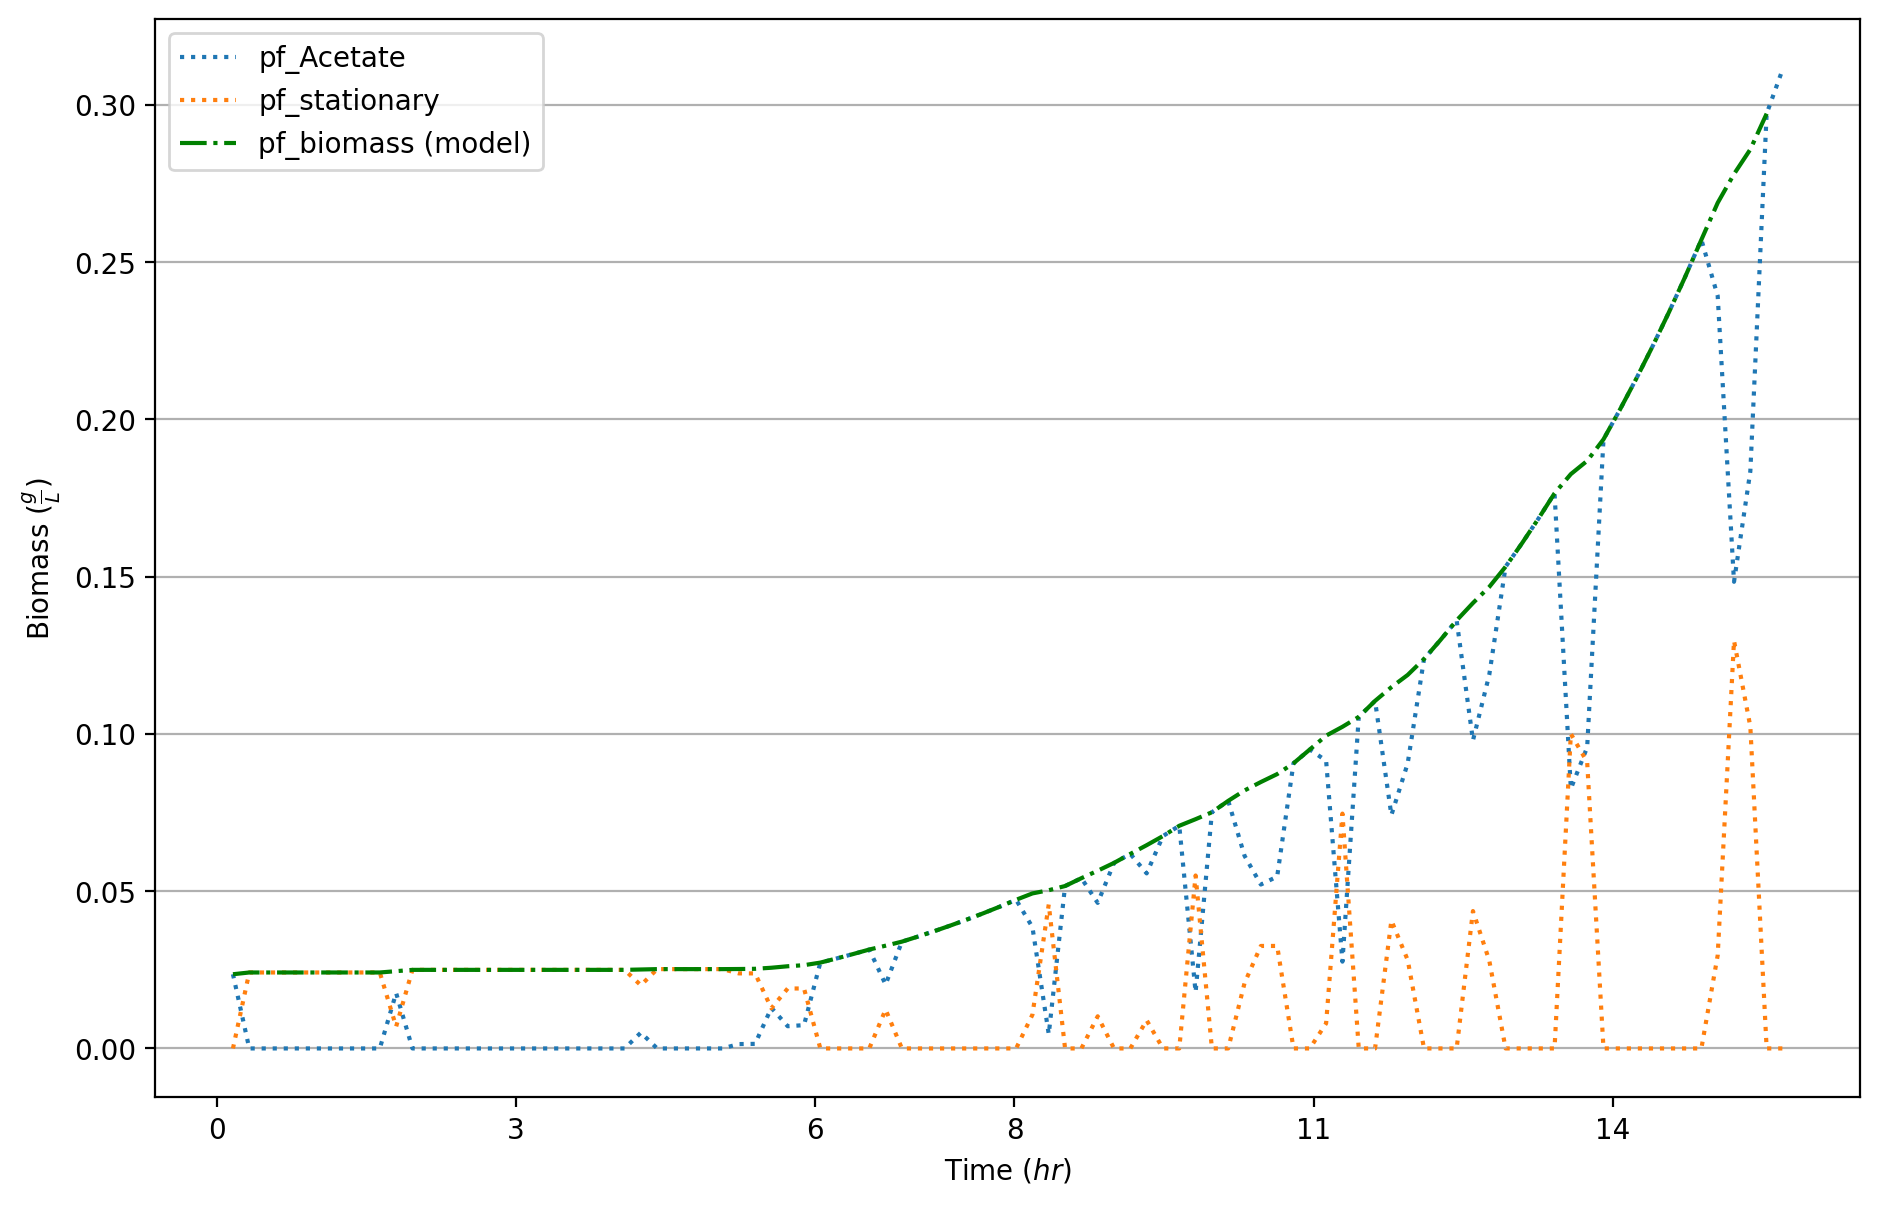

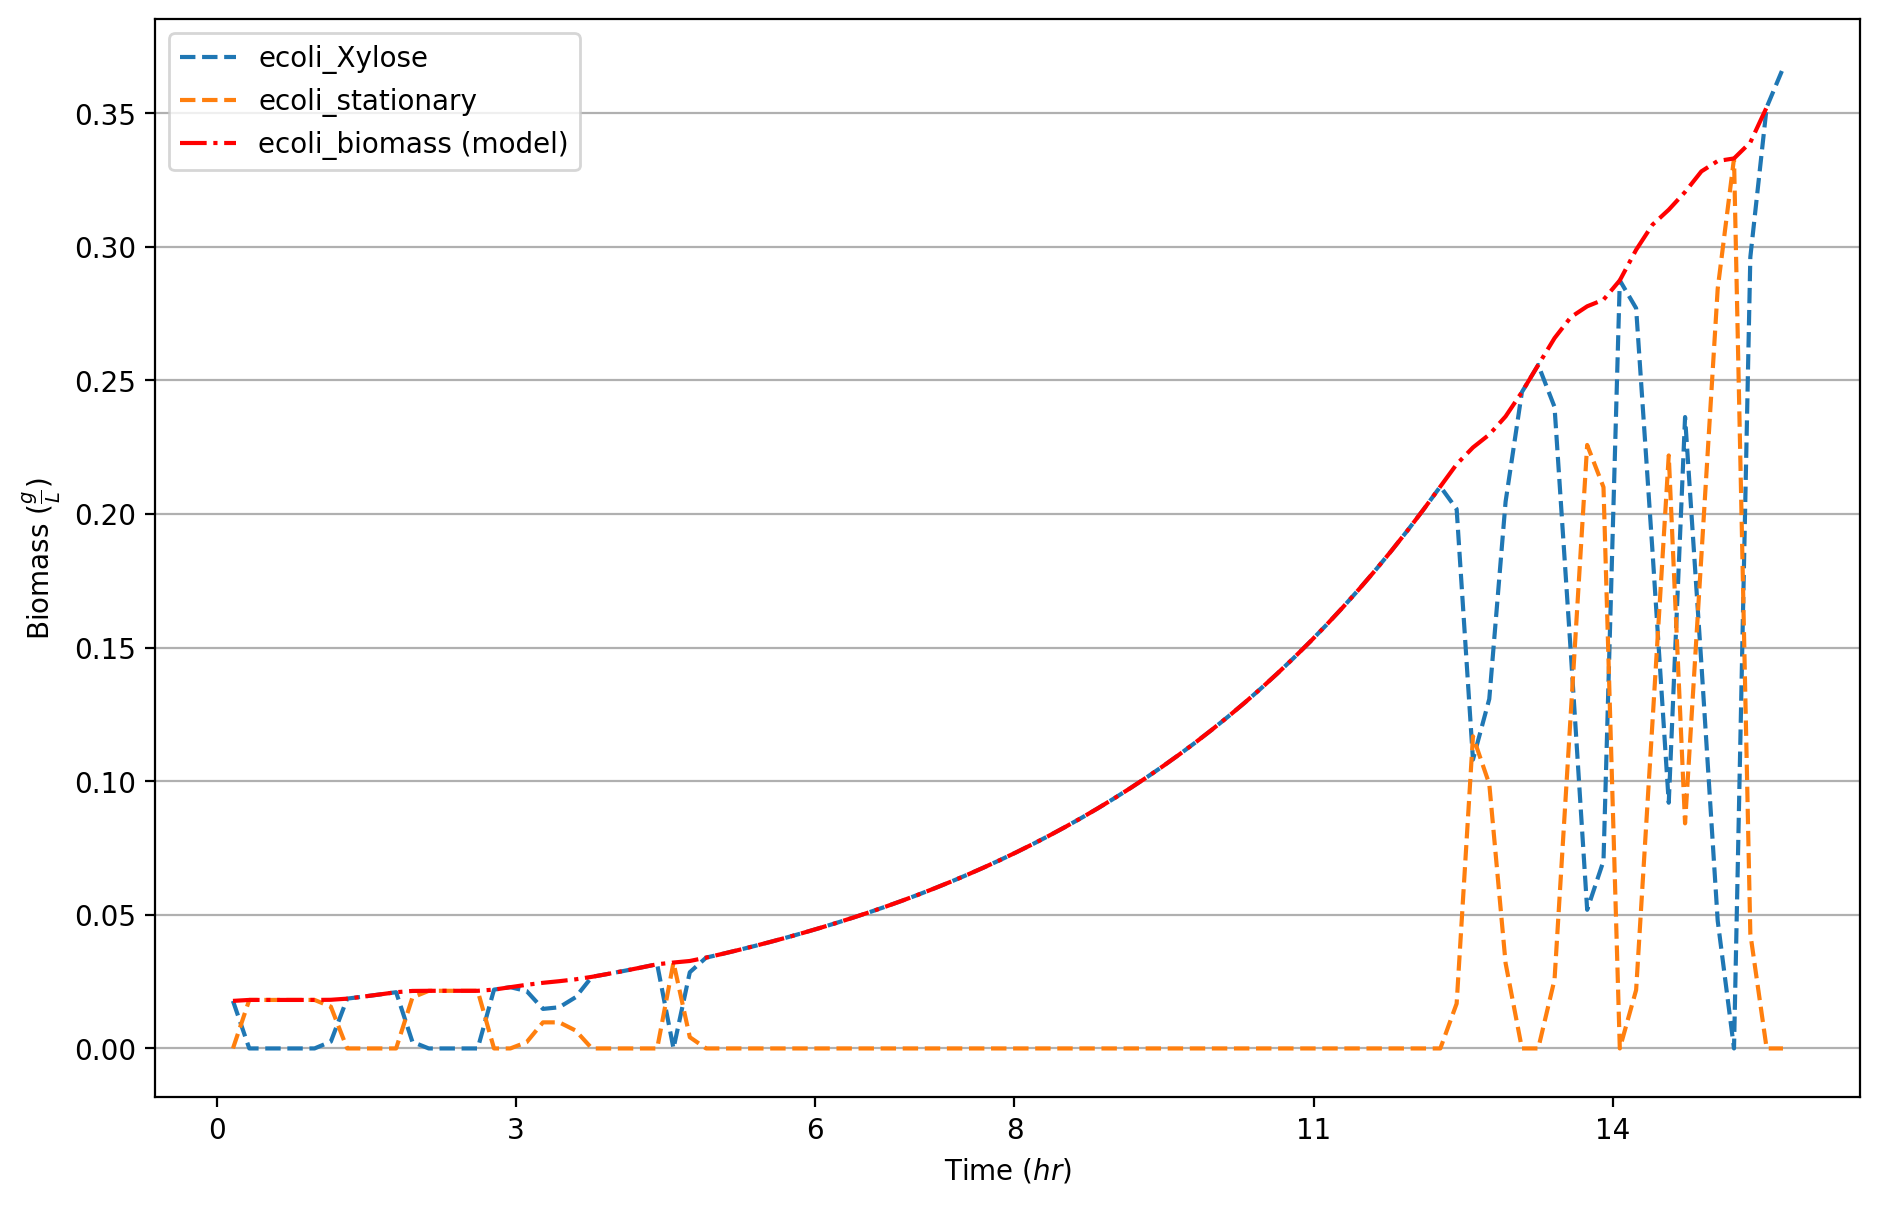

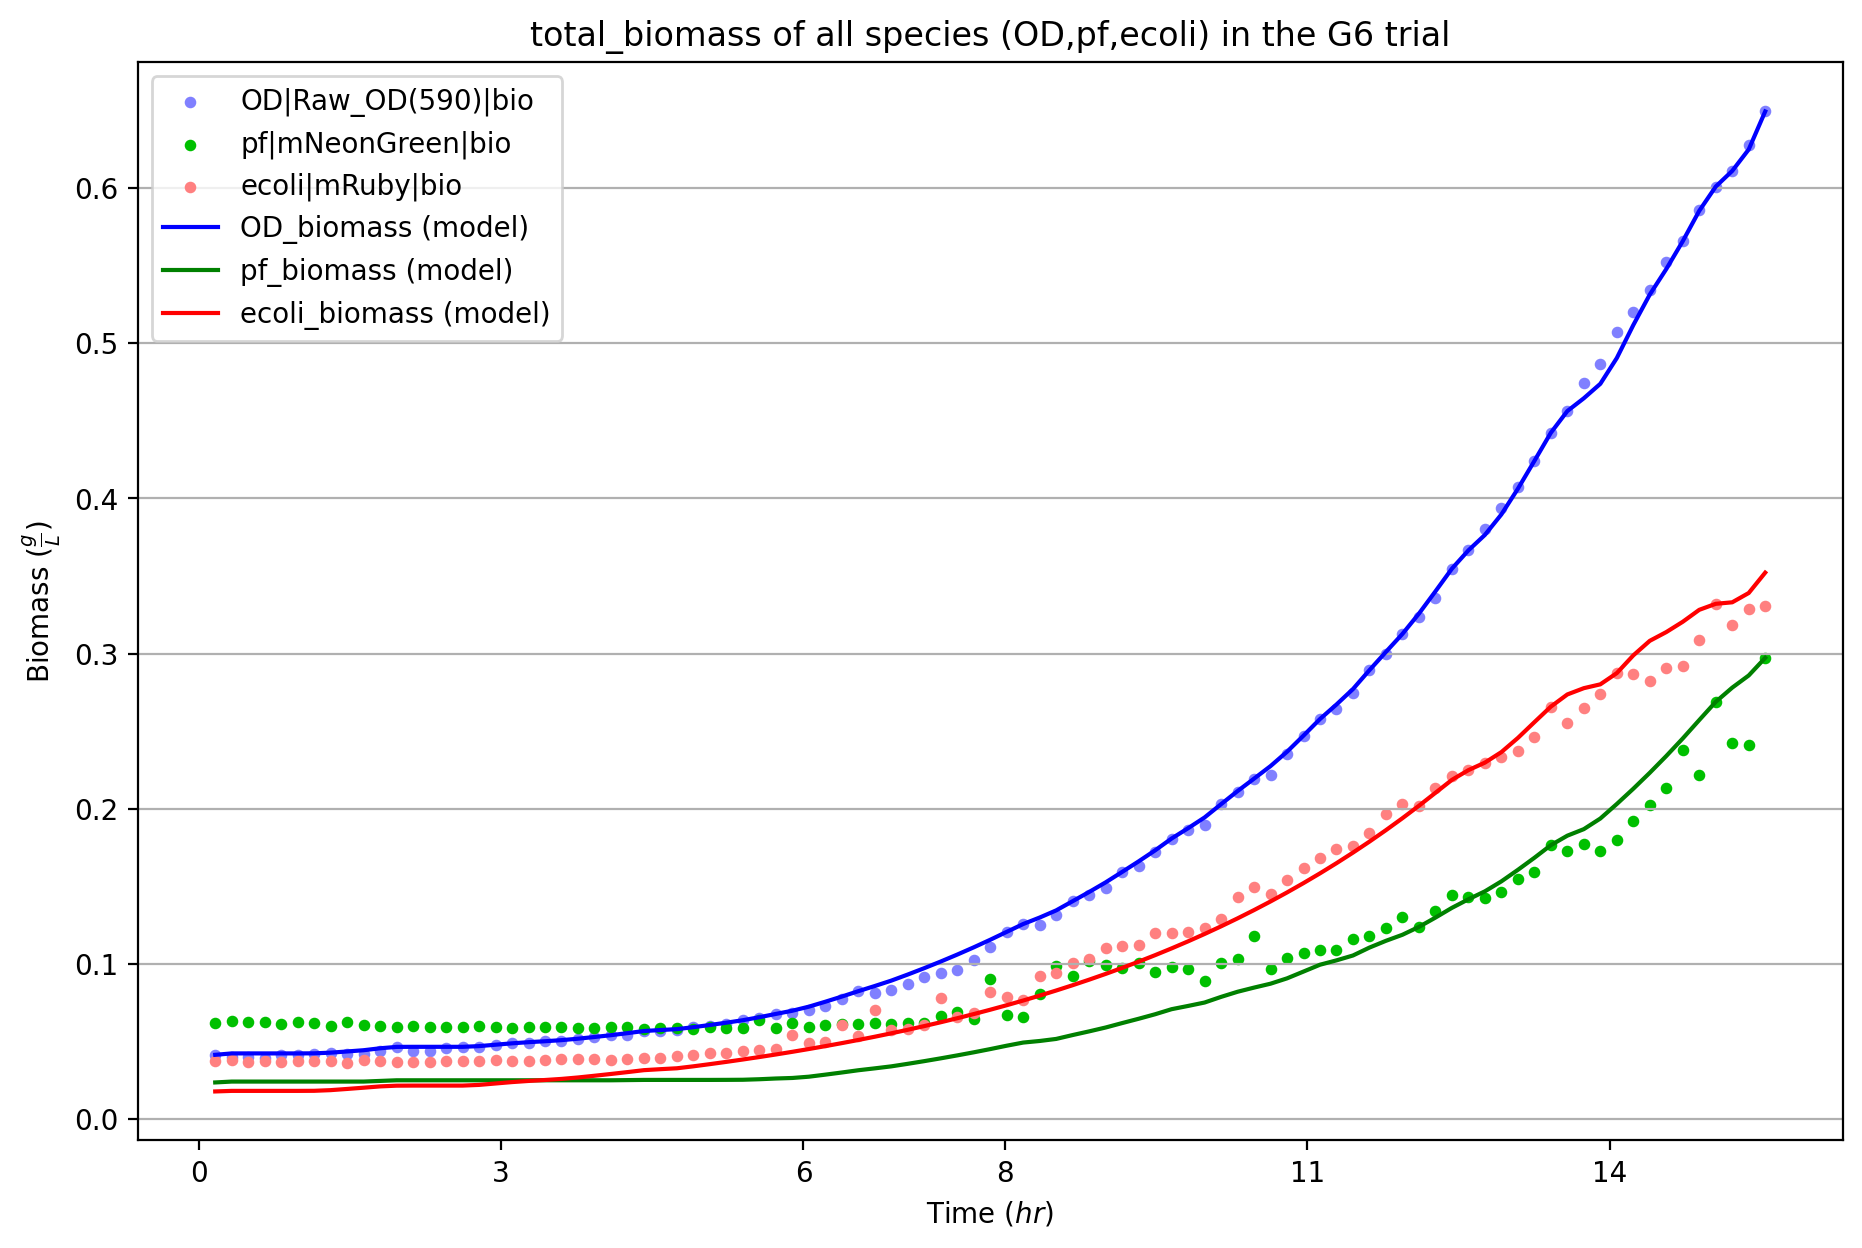

In [11]:
from modelseedpy import MSCommPhitting

test_com = MSCommPhitting('/Users/ashleyeng/Documents/Python/ModelSEEDDatabase',
                           community_members = {
                                ecoli: {
                                    'name': 'ecoli', 
                                    'phenotypes': {
                                        #'Maltose': {"consumed":["cpd00179"],
                                               #"excreted":["cpd00029"]}, 
                                        #'Acetate': {"consumed":["cpd00029"]},
                                        'Xylose': {"consumed":["cpd00154"],
                                                "excreted":["cpd00363"]}
                                     }
                                },
                                pf: {
                                    'name': 'pf',
                                    'phenotypes': {
                                        'Acetate': {"consumed":["cpd00029"]},
                                        #'Glycerol': {"consumed":["cpd00100"],
                                               #"excreted":["cpd00266"]}
                                    }
                                }
                            },
                            data_paths = {'path':"data/Jeffs_data/PF-EC 4-29-22 ratios and 4HB changes.xlsx", 'Raw OD(590)':'OD', 'mNeonGreen':'pf', 'mRuby':'ecoli'},
                            species_abundances = species_abundances,
                            carbon_conc = carbon_conc_series,
                            ignore_trials = {'rows': ['C', 'D', 'E', 'F', 'G'], 'columns': [1,2,3,4,5,6,8,9,10,11,12]},
                            species_identities_rows = species_identities_rows)

test_com.fit(parameters = {'cvmin': .1, 'bcv': 0.0001, "stationary": 5e-3},
             mets_to_track = ["cpd00363","cpd00154"],
             rel_final_conc = {"cpd00154":0.1},
             zero_start = ["cpd00363"],
             #abs_final_conc = {"cpd00029":0}, # metabolomics data
             graphs=update_graphs("G6"),
             export_zip_name = 'ethanol.zip',
             export_lp = "ethanol.lp",
             primals_export_path="test_primals_simple.json")